In [1]:
using CSV 
using DataFrames 

using Plots 
using Statistics 
using StatsPlots

In [2]:
"""
Goal: predict dividends and horse placings in a race


"""

"Goal: predict dividends and horse placings in a race\n\n\n"

In [3]:
races = CSV.read("races.csv")
runs = CSV.read("runs.csv")


,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country
,Int64,Int64,Int64,Int64,Float64,Float64,Int64,String?
1,0,1,3917,10,0.0,8.0,3,AUS
2,0,2,2157,8,0.0,5.75,3,NZ
3,0,3,858,7,0.0,4.75,3,NZ
4,0,4,1853,9,0.0,6.25,3,SAF
5,0,5,2796,6,0.0,3.75,3,GB
6,0,6,3296,3,0.0,1.25,3,NZ
7,0,7,911,12,0.0,9.5,3,NZ
8,0,8,2170,1,1.0,0.0,3,AUS
9,0,9,1730,13,0.0,9.75,3,NZ


In [230]:

showall(head(races))


6×37 DataFrame
│ Row │ race_id │ date       │ venue  │ race_no │ config │ surface │ distance │
│     │ Int64   │ Dates.Date │ String │ Int64   │ String │ Int64   │ Int64    │
├─────┼─────────┼────────────┼────────┼─────────┼────────┼─────────┼──────────┤
│ 1   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 2   │ 1       │ 1997-06-02 │ ST     │ 2       │ A      │ 0       │ 1200     │
│ 3   │ 2       │ 1997-06-02 │ ST     │ 3       │ A      │ 0       │ 1400     │
│ 4   │ 3       │ 1997-06-02 │ ST     │ 4       │ A      │ 0       │ 1200     │
│ 5   │ 4       │ 1997-06-02 │ ST     │ 5       │ A      │ 0       │ 1600     │
│ 6   │ 5       │ 1997-06-02 │ ST     │ 6       │ A      │ 0       │ 1200     │

│ Row │ going        │ horse_ratings │ prize    │ race_class │ sec_time1 │
│     │ String       │ String        │ Float64? │ Int64      │ Float64   │
├─────┼──────────────┼───────────────┼──────────┼────────────┼───────────┤
│ 1   │ GOOD TO FIRM │ 40-15         │ 

In [231]:
print(size(runs), size(races))

(79447, 37)(6349, 37)

In [4]:
function summary_stats(arr)
    clean_arr = skipmissing(arr)
    print("missing: $(mean(ismissing.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end


p

LoadError: UndefVarError: p not defined

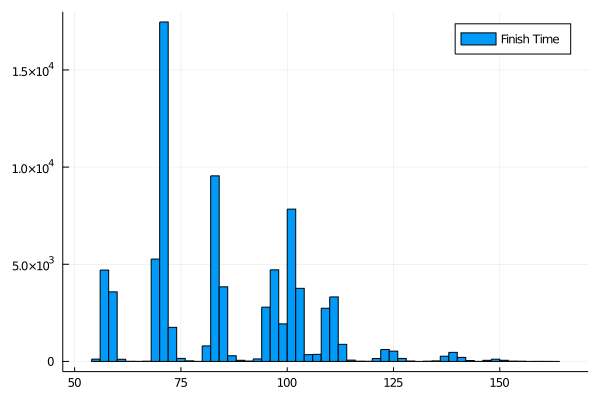

In [18]:
histogram(runs[:finish_time], label="Finish Time")

In [25]:
horse_ages = runs[:horse_age] # current age in years 
horse_type = runs[:horse_type] # Sex of horse, gelding, marem horse, rig, colt 
declared_weight = runs[:declared_weight] # Weight of horse and jockey 
actual_weight = runs[:actual_weight] # weight of everything on horse, i.e. saddle and jockey 


79447-element Array{Int64,1}:
 133
 133
 132
 127
 131
 127
 123
 128
 123
 125
 123
 123
 120
   ⋮
 130
 129
 128
 127
 126
 125
 123
 122
 119
 120
 119
 118

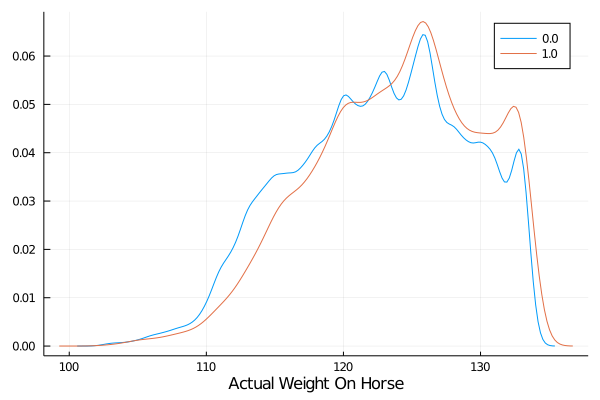

In [40]:
density(runs[:actual_weight], group=runs[:won])
xlabel!("Actual Weight On Horse")


In [5]:
# Inner join to get full dataset 
select!(races, Not(:time1))
select!(races, Not(:time2))
select!(races, Not(:time3))
select!(races, Not(:time4))
select!(races, Not(:time5))
select!(races, Not(:time6))
select!(races, Not(:time7))


full_data = innerjoin(races, runs, on =:race_id)

print(size(full_data))
showall(head(full_data))

(79447, 66)6×66 DataFrame
│ Row │ race_id │ date       │ venue  │ race_no │ config │ surface │ distance │
│     │ Int64   │ Dates.Date │ String │ Int64   │ String │ Int64   │ Int64    │
├─────┼─────────┼────────────┼────────┼─────────┼────────┼─────────┼──────────┤
│ 1   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 2   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 3   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 4   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 5   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 6   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │

│ Row │ going        │ horse_ratings │ prize    │ race_class │ sec_time1 │
│     │ String       │ String        │ Float64? │ Int64      │ Float64   │
├─────┼──────────────┼───────────────┼──────────┼────────────┼───────────┤
│ 1   │ GOOD TO FIRM │ 40-15

│ 5   │ 21.75   │ 23.22   │ 23.5     │ missing  │ missing  │ 83.24       │
│ 6   │ 22.03   │ 22.9    │ 23.57    │ missing  │ missing  │ 82.83       │

│ Row │ win_odds │ place_odds │ trainer_id │ jockey_id │
│     │ Float64  │ Float64?   │ Int64      │ Int64     │
├─────┼──────────┼────────────┼────────────┼───────────┤
│ 1   │ 9.7      │ 3.7        │ 118        │ 2         │
│ 2   │ 16.0     │ 4.9        │ 164        │ 57        │
│ 3   │ 3.5      │ 1.5        │ 137        │ 18        │
│ 4   │ 39.0     │ 11.0       │ 80         │ 59        │
│ 5   │ 50.0     │ 14.0       │ 9          │ 154       │
│ 6   │ 7.0      │ 1.8        │ 54         │ 34        │

In [6]:

# Getting the columns in our dataset that have atleast one missing entry 

cols_missing = colwise(x -> any(ismissing.(x)), full_data)
cols_with_missing = []
for i=1:66
    if cols_missing[i] > 0 
        append!(cols_with_missing, i)
    end
end

names_list = names(full_data)
col_names_missing =[]
for i in cols_with_missing
    push!(col_names_missing, String(names_list[i]))
end

print(x for x in col_names_missing)

Base.Generator{Array{Any,1},typeof(identity)}(identity, Any["prize", "sec_time4", "sec_time5", "sec_time6", "sec_time7", "place_combination3", "place_combination4", "place_dividend3", "place_dividend4", "win_combination2", "win_dividend2", "horse_country", "horse_type", "position_sec4", "position_sec5", "position_sec6", "behind_sec4", "behind_sec5", "behind_sec6", "time4", "time5", "time6", "place_odds"])

In [242]:
summary_stats(full_data[:place_odds])

missing: 0.047012473724621445%
maximum: 101.0
minimum: 1.0
median:  4.1
mean:    7.423177303465718
std:     8.823429889330196


In [ ]:
# Now we need to address these missing values 
# Lets look out percent of missing in each column.

for name in col_names_missing 
    try summary_stats(full_data[name])
    catch
        print("***************************")
        print("Empty array")
        print("***************************")
        print("\n")
    end
    
end

In [247]:
typeof(full_data)

DataFrame

In [7]:
"""
We are deleting the following columns: 
    horse_gear
    sec_time1
    sec_time2
    sec_time3
    sec_time4
    sec_time5
    sec_time6
    sec_time7
    time1
    time2
    time3
    time4
    time5
    time6
    time7
    
    Since we joined on races.csv with runs.csv we have the results of all the places for each horse. Thus these columns 
    are repetitve since we have the 'results' column. 
    place_combination1 
    place_combination2
    place_combination3
    place_combination4 

    place_dividend4 -> 99% missing 

    win_combination1 -> exactly same column as place_combination1
    win_combination2 -> 99% missing 
    
    win_dividend2 -> 99% missing 

    position_sec4
    position_sec5
    position_sec6
    
    behind_sec4
    behind_sec5
    behind_sec6

    place_odds """

select!(full_data, Not(:horse_gear))
select!(full_data, Not(:sec_time1))
select!(full_data, Not(:sec_time2))
select!(full_data, Not(:sec_time3))
select!(full_data, Not(:sec_time4))
select!(full_data, Not(:sec_time5))
select!(full_data, Not(:sec_time6))
select!(full_data, Not(:sec_time7))

select!(full_data, Not(:time1))
select!(full_data, Not(:time2))
select!(full_data, Not(:time3))
select!(full_data, Not(:time4))
select!(full_data, Not(:time5))
select!(full_data, Not(:time6))
                            
select!(full_data, Not(:place_combination1))
select!(full_data, Not(:place_combination2))
select!(full_data, Not(:place_combination3))
select!(full_data, Not(:place_combination4))

select!(full_data, Not(:place_dividend4))

select!(full_data, Not(:win_combination1))   
select!(full_data, Not(:win_combination2))

select!(full_data, Not(:win_dividend2))

select!(full_data, Not(:place_odds))


        
                            
                                            


,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings
,Int64,Date…,String,Int64,String,Int64,Int64,String,String
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
5,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
6,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
7,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
8,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
9,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15


In [8]:
using Dates
N =size(full_data)
dayofyear = []
for i=1:79305
    append!(dayofyear, Dates.dayofyear(full_data[i, :date]))
end



full_data = hcat(dayofyear, full_data)
select!(full_data, Not(:date))

LoadError: ArgumentError: New columns must have the same length as old columns

In [9]:
"""
One hot encoding 


"""
one_hot_labels = [
  :horse_type,
  :horse_country
]

#Sets of all categories in a particular column
uniq_sets = [unique(full_data[:, label]) for label in one_hot_labels]


"Computes a onehot vector for every entry in column given a set of categories cats"
function onehot(column, cats=unique(column))
    result = zeros(length(column), length(cats))
 
    for r in 1:length(column)
        for c in 1:length(cats)
            
            if column[r] == cats[c] 
                result[r, c] = 1
            
            end
        end
    end
   
    result
end


onehot

In [11]:
uniq_sets[1]

10-element Array{Union{Missing, String},1}:
 "Gelding"
 "Mare"
 "Horse"
 "Brown"
 "Rig"
 "Colt"
 missing
 "Roan"
 "Filly"
 "Grey"

In [12]:
onehot(full_data[:, :horse_type], uniq_sets[1])

LoadError: TypeError: non-boolean (Missing) used in boolean context

In [ ]:
horse_type_and_country =  hcat([onehot(full_data[:, one_hot_labels[i]], full_data[one_hot_labels[i]]) for i in 1:size(one_hot_labels, 1)]...)


In [313]:
"""
We are replacing missing values with the column mean for the following columns:
    prize


Deleting the missing rows from these columns: 
    place_dividend3 -> since there are only a handful missing (0.1% missing)
    
    horse_country -> missing extremely few (0.000025%) missing -> 2 rows! 

    horse_type -> same two rows missing as horse_country that will be deleted 

"""
# replacing missing values with the column mean for prize
coalesce.(full_data[:prize], mean(full_data[:prize]))


# dropping  missing values from place_dividend3 only a handful of rows
dropmissing!(full_data, :place_dividend3)
dropmissing!(full_data, :horse_country)






,x1,nrow
,Any,Int64
1,1,207
2,2,207
3,3,210
4,4,255
5,5,311
6,6,354
7,7,189
8,9,230
9,10,368


In [312]:
# Splitting up full data into 6 different datasets by race distance.
sort!(full_data, :distance)
dist_1000, dist_1200, dist_1400, dist_1600, dist_1650, dist_1800, dist_2000, dist_2200, dist_2400 = groupby(full_data, :distance)


dataframes= [dist_1000, dist_1200, dist_1400, dist_1600, dist_1650, dist_1800, dist_2000, dist_2200, dist_2400]




9-element Array{SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}},1}:
 8479×43 SubDataFrame. Omitted printing of 36 columns
│ Row  │ x1  │ race_id │ venue  │ race_no │ config │ surface │ distance │
│      │ Any │ Int64   │ String │ Int64   │ String │ Int64   │ Int64    │
├──────┼─────┼─────────┼────────┼─────────┼────────┼─────────┼──────────┤
│ 1    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 2    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 3    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 4    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 5    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 6    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 7    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 8    │ 153 │ 7       │ ST     │ 8       │ A      │ 0       │ 1000     │
│ 9    │ 153 │ 7       │ ST     │ 8       │ A      │ 0  

In [208]:
# Now we have 9 different datasets for the different race lengths

"""
Now we will handle our date feature and our categorical columns.

For our date column we will convert the Date object to a day of the year (int) to account for seasonality.

For categorical features we will be doing one-hot encoding over many hot encoding because we do not have any sets.
"""



,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings
,Int64,Date…,String,Int64,String,Int64,Int64,String,String
1,228,1997-08-31,ST,4,A,0,2400,GOOD,G
2,228,1997-08-31,ST,4,A,0,2400,GOOD,G
3,228,1997-08-31,ST,4,A,0,2400,GOOD,G
4,228,1997-08-31,ST,4,A,0,2400,GOOD,G
5,228,1997-08-31,ST,4,A,0,2400,GOOD,G
6,228,1997-08-31,ST,4,A,0,2400,GOOD,G
7,228,1997-08-31,ST,4,A,0,2400,GOOD,G
8,228,1997-08-31,ST,4,A,0,2400,GOOD,G
9,228,1997-08-31,ST,4,A,0,2400,GOOD,G


In [ ]:

temp = by(full_data, :x1, nrow) # Get how many unique values in categories 
sort!(temp, :x1)


In [209]:
summary_stats(full_data[:prize])

missing: 0.07362140798268028%
maximum: 2.5e7
minimum: 485000.0
median:  800000.0
mean:    1.117460528818718e6
std:     1.734767015260773e6
